In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)},font_scale=1.5)

moms = pd.read_csv('moms.csv', usecols=['edad', 'ascendencia',
       'estado_laboral', 'sueldo', 'busca_otro_trabajo', 'actividad',
       'asistencia alguna vez a enseñanza', 'edu preescolar', 'edu primaria',
       'edu media', 'edu técnica', 'edu univ o simil', 'edu terciario no uni',
       'edu posgrado', 'edu mag prof', 'hijos'])

moms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               29322 non-null  float64
 1   ascendencia                        29322 non-null  object 
 2   estado_laboral                     29322 non-null  object 
 3   sueldo                             29322 non-null  float64
 4   busca_otro_trabajo                 29322 non-null  object 
 5   actividad                          14943 non-null  object 
 6   asistencia alguna vez a enseñanza  29322 non-null  object 
 7   edu preescolar                     29322 non-null  object 
 8   edu primaria                       29322 non-null  object 
 9   edu media                          29322 non-null  object 
 10  edu técnica                        29322 non-null  object 
 11  edu univ o simil                   29322 non-null  obj

In [2]:
moms['estado_laboral'].unique()

array(['Ocupados', 'Inactivo, pensionista', 'Inactivo, jubilado',
       'Desocupados propiamente dichos',
       'Inactivo, realiza los quehaceres del hogar', 'Inactivo, rentista',
       'Inactivo, otro', 'Desocupados en seguro de desempleo',
       'Inactivo, estudiante', 'Desocupados BT1V', 'Menor 14 años'],
      dtype=object)

In [3]:
moms.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
edad,29322.0,56.24323,17.248914,0.0,42.0,57.0,70.0,98.0
sueldo,29322.0,11890.70766,21453.966560,0.0,0.0,0.0,20000.0,320000.0
hijos,29322.0,0.75162,0.982540,0.0,0.0,0.0,1.0,7.0


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in list(moms.columns):
    if moms[i].dtype != 'int64':
        moms[i] = le.fit_transform(moms[i])

moms

,edad,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
0,21,2,10,604,1,325,1,2,2,3,2,3,2,4,2,1
1,16,1,10,0,1,120,1,2,2,3,2,0,0,0,0,1
2,15,2,10,0,1,253,1,1,2,3,2,0,0,0,0,3
3,17,1,10,0,1,120,1,2,2,3,2,0,0,0,0,1
4,17,1,10,257,2,120,1,2,2,3,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29317,17,2,10,284,1,182,1,1,2,3,3,3,2,1,2,0
29318,17,2,10,379,1,182,1,1,2,3,3,3,2,1,2,0
29319,17,2,10,379,1,182,1,1,2,3,3,3,2,1,2,0
29320,49,2,6,0,0,333,1,1,2,3,2,0,0,0,0,0


<AxesSubplot:>

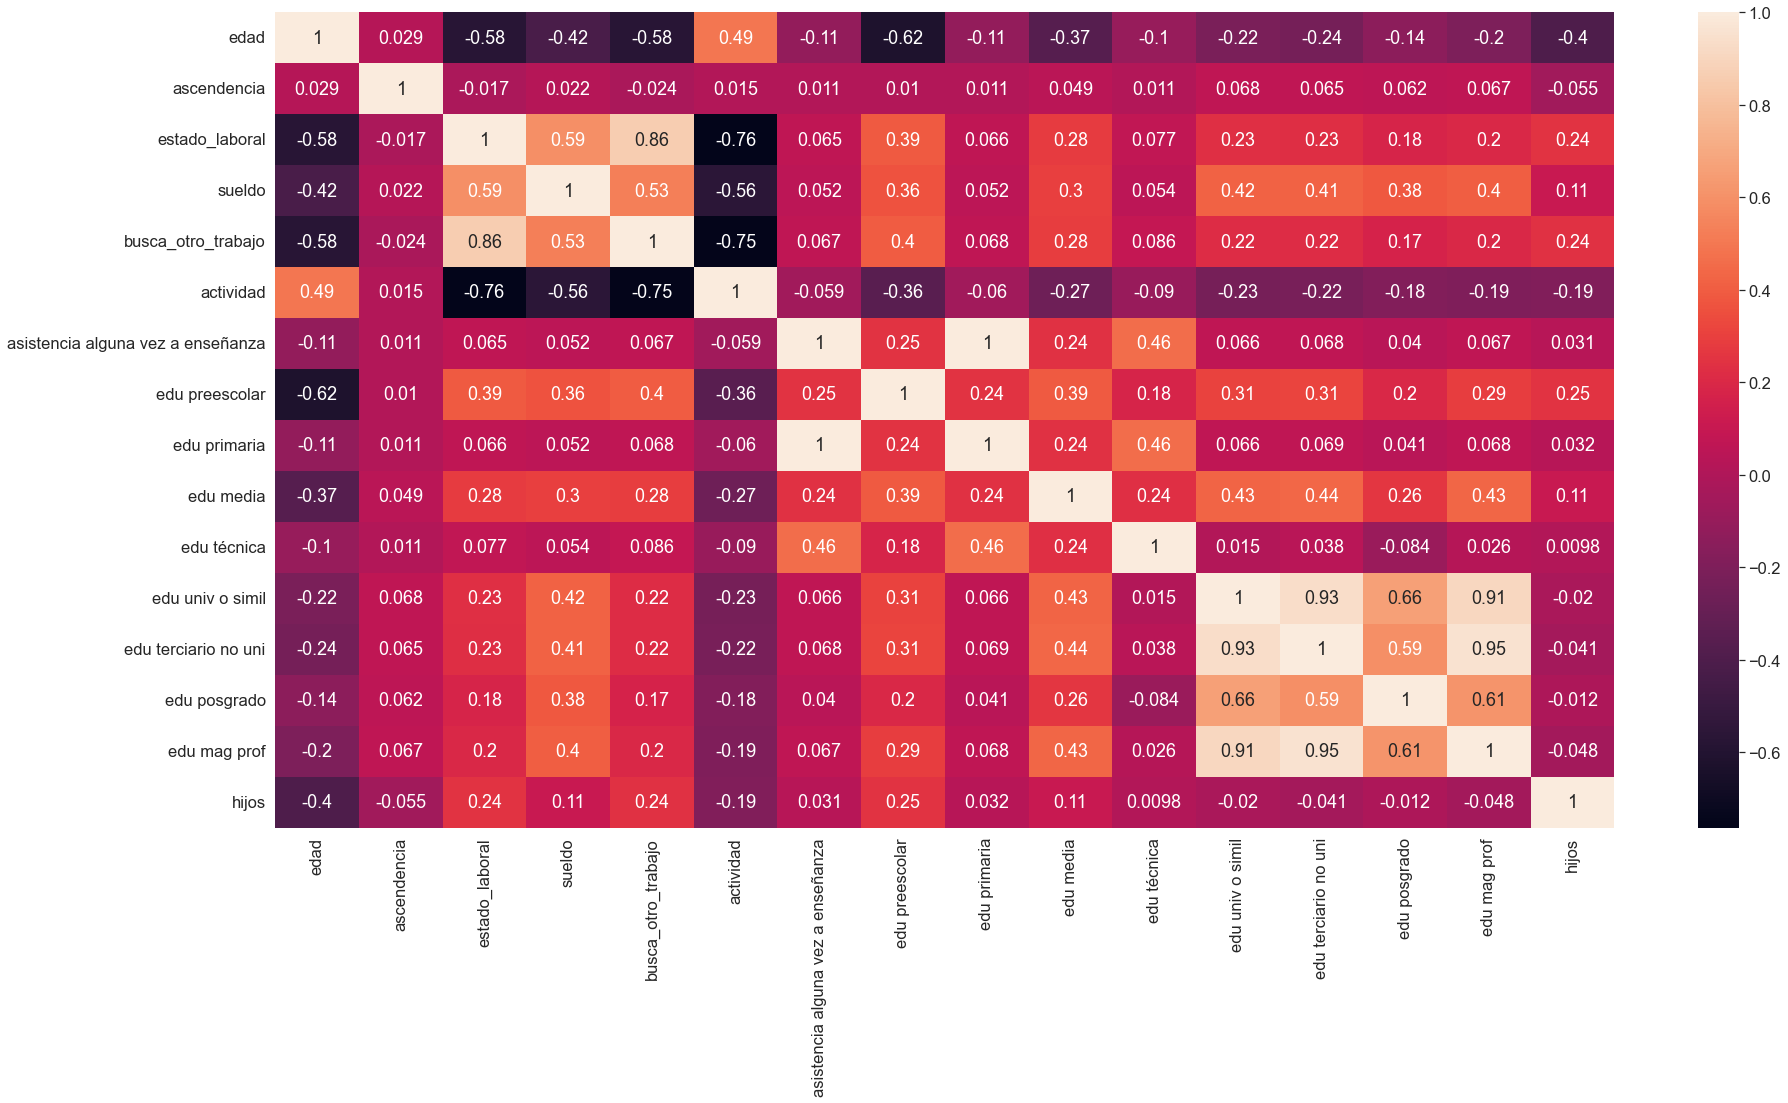

In [5]:
corr = moms.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [6]:
# Feautures
X = moms.drop(labels=['sueldo'], axis=1)
y = moms['sueldo'].to_numpy()

print('X shape', X.shape, '\nY shape', y.shape)

X shape (29322, 15) 
Y shape (29322,)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

linear_reg.score(X, y)

0.47765353267749344

In [9]:
linear_reg.coef_

array([ -0.61956639,   3.07634549,  23.33573055, -12.52112529,
        -0.3667949 , -87.34019832,  18.40199401,  15.64978486,
        -1.11486371,   9.05628292,   0.57106636,  13.30105283,
        31.50701506,  17.74766106,  -5.41570587])

In [10]:
linear_reg.intercept_

41.158020344976904

In [11]:
# prediction = linear_reg.predict(x_test)

# prediction